# NPS Classification 

In [1]:
working_dir = "/Users/christabellekozlik/Desktop/MSBA/Fall 2017/Applied Data Analysis/Python/NPS Project/"
input_file = "NPS Survey Data 2017.1a_V0_may.csv"

Below, the a column was added and data was separated into three categories: promoters, neutral, and detractors based on the rating criteria Dodge uses for NPS surveys. 

In [2]:
import nltk
import csv
import re

from nltk.corpus import names
from nltk.corpus import stopwords
import random

labeled_comment = list()


with open(working_dir + input_file,'r',encoding="Latin-1") as infile :
    split_nps = csv.reader(infile, delimiter = ",")
    next(split_nps)
    for line in split_nps:
        print(line)
        if line[4] == "10" or line[4] == "9":
            labeled_comment.append((line[6], 'promoter'))
        elif line[4] == "8" or line[4] == "7":
            labeled_comment.append((line[6], 'neutral'))
        else:
            labeled_comment.append((line[6], 'detractor'))


['4/21/17', '15:48:15', 'kmaple@powerplus.com', 'Inside nonBPM', '6', 'detractor', 'Dodge is a good starting point to see a lot of the public and private construction jobs that are going on in many different markets; however, a lot of the times the information posted is not accurate or has minimal information posted, so a lot of the times I feel like the Dodge Reporter. Customer service rarely gets back when inquiring for help. Thanks!', 'Usability ', 'unknown', '', 'Y', 'kmaple@powerplus.com', 'negative', 'NGO']
['4/4/17', '7:24:30', 'dgrande@bac1ny.com', 'Strategic nonBPM', '10', 'promoter', 'I start every day with Dodge. Always looking for new projects. Dodge makes my job a lot easier.', 'Usability ', 'Intuitive ', '', 'Y', 'dgrande@bac1ny.com', 'positive', 'multi']
['4/4/17', '19:23:27', 'ibew@ibew153.com', 'Strategic nonBPM', '8', 'neutral', 'great place to find info about up coming projects', 'Usability ', 'unknown', '', 'Y', 'ibew@ibew153.com', 'positive', 'NGO']
['4/5/17', '12:

In [3]:
labeled_comment[:50]

[('Dodge is a good starting point to see a lot of the public and private construction jobs that are going on in many different markets; however, a lot of the times the information posted is not accurate or has minimal information posted, so a lot of the times I feel like the Dodge Reporter. Customer service rarely gets back when inquiring for help. Thanks!',
  'detractor'),
 ('I start every day with Dodge. Always looking for new projects. Dodge makes my job a lot easier.',
  'promoter'),
 ('great place to find info about up coming projects', 'neutral'),
 ('I think the information for the most part is updated in a timely fashion and fairly accurate most of the time. You maybe able to improve a little. You offer a good product with a great value.',
  'neutral'),
 ('Reports are not always accurate, details are not always correct. And much of the private work does not get listed, seem to focus on public work.',
  'detractor'),
 ('Dodge is a very useful tool in the construction industry.', 

In the cell below the comments were split into words, capital letters were translated to lowercase, stop words were removed, and punctuation was removed. This provides a clean comment that can be more easily assessed for polarity. Accuracy increase from 56% to 86% when removing stop words. 

In [4]:
set(stopwords.words('english'))

def NPS_Comment(comment):
     
    split_comment = comment.split(" ") 
    lowcase_comment = [thing.lower() for thing in split_comment]  
    stop_wrd = [word for word in lowcase_comment if word not in (stopwords.words('english'))]
    clean_comment = [re.sub(r'[^\w\s]','',word) for word in stop_wrd] 
    print(clean_comment)                                                                   
    ret_val = {}
    for word in clean_comment:
        ret_val[word] = True
    return(ret_val)

NPS_Comment("great place to find info about up coming projects")

['great', 'place', 'find', 'info', 'coming', 'projects']


{'coming': True,
 'find': True,
 'great': True,
 'info': True,
 'place': True,
 'projects': True}

Separating the dataset into three sets is important for ensuring accuracy and quality assurance of the classifier. Below we create a training set and test set for the NPS scores we are classifying and assessing the most informative featurs from. 

In [5]:
featuresets = [(NPS_Comment(n), label) for (n, label) in labeled_comment]
train_set, test_set = featuresets[50:], featuresets[:50]
classifier = nltk.NaiveBayesClassifier.train(train_set)

['dodge', 'good', 'starting', 'point', 'see', 'lot', 'public', 'private', 'construction', 'jobs', 'going', 'many', 'different', 'markets', 'however', 'lot', 'times', 'information', 'posted', 'accurate', 'minimal', 'information', 'posted', 'lot', 'times', 'feel', 'like', 'dodge', 'reporter', 'customer', 'service', 'rarely', 'gets', 'back', 'inquiring', 'help', 'thanks']
['start', 'every', 'day', 'dodge', 'always', 'looking', 'new', 'projects', 'dodge', 'makes', 'job', 'lot', 'easier']
['great', 'place', 'find', 'info', 'coming', 'projects']
['think', 'information', 'part', 'updated', 'timely', 'fashion', 'fairly', 'accurate', 'time', 'maybe', 'able', 'improve', 'little', 'offer', 'good', 'product', 'great', 'value']
['reports', 'always', 'accurate', 'details', 'always', 'correct', 'much', 'private', 'work', 'get', 'listed', 'seem', 'focus', 'public', 'work']
['dodge', 'useful', 'tool', 'construction', 'industry']
['easy', 'use']
['well', 'covered', 'areas', 'jobs', 'going', 'state']
['o

['dodge', 'never', 'plans', 'specs', 'ready', 'sufficient', 'time', 'us', 'prepare', 'bids', 'constantly', 'go', 'builders', 'exchange', 'get', 'data', 'paying', 'dodge']
['helpful', 'finding', 'jobs', 'tracking', 'them']
['things', 'like', 'dont', 'right', 'fit', 'business']
['info', 'projects', 'delivered', 'time', 'sources']
['search', 'engine', 'really', 'bad', 'key', 'word', 'search', 'even', 'give', 'results', 'know', 'coming', 'up', 'narrow', 'still', 'search', 'gives', 'kinds', 'projects', 'related', 'search']
['havent', 'able', 'use', 'dodge', 'data', '', 'analytics', 'jobs', 'close', 'deadline']
['could', 'walk', 'street', 'see', 'jobs', 'going', 'getting', 'company']
['wide', 'array', 'projects', 'easy', 'access', 'plans', 'specs']
['information', 'bid', 'results', 'lacking']
['dodge', 'needs', 'provide', 'better', 'coverage', 'private', 'jobs', 'seems', 'great', 'coverage', 'public', 'work', 'many', 'private', 'projects', 'missed']
['overall', 'good', 'site', 'batch', 'down

['perspective', 'beaumont', 'tx', 'appears', 'reporting', 'coverage', 'focused', 'houston', 'market', 'harris', 'county', 'beaumont', '', 'jefferson', 'surrounding', 'counties', 'se', 'texas', 'areas', 'appears', 'need', 'add', 'dodge', 'rep', 'dig', 'cover', 'area', 'two', 'cents', 'se']
['ive', 'worked', 'dodge', 'reports', 'since', '2006', 'always', 'helped', 'immediately', 'problem', 'either', 'system', 'search']
['high', 'volume', 'already', 'completed', 'projects']
['like', 'break', 'dollar', 'volumes', 'project', 'go', 'ones', 'want', 'forcing', 'pursue', 'projects', 'determine', 'interest', 'level']
['new', 'dodge', 'experience', 'learned', 'point', 'helpful', 'day', 'day', 'needs', 'sure', 'work', 'dodge', 'find', 'its', 'different', 'uses', 'helpful', 'company', 'trinity', 'equipment', 'rentalssales']
['satisfied', 'recommending', 'services', 'franchises', 'everyone', 'franchises', 'happy', 'dodge', 'excited', 'keep', 'using', 'dodge', 'find', 'leads', 'sales', 'marketing', '

['dodge', 'rarely', 'provides', 'projects', 'organization', 'already', 'aware', 'of', 'primary', 'benefit', 'use', 'contact', 'designer', 'information', 'sometimes', 'privy', 'to', 'additionally', 'analytics', 'piece', 'spec', 'rates', 'helpful', 'line', 'card', 'currently', 'narrow', 'its', 'effective', 'us', 'summary', 'its', 'hard', 'justify', 'expense', 'dodge', 'information', 'actually', 'provides', 'company', 'realize', 'however', 'many', 'companies', 'organizations', 'use', 'dodge', 'differently', 'probably', 'find', 'value', 'it']
['sometime', 'limits', 'access']
['services', 'use', 'leads']
['dodge', 'great', 'source', 'finding', 'projects', 'would', 'otherwise', 'aware', 'of']
['im', 'currently', 'passive', 'comes', 'dodge', 'pros', 'dodge', '', 'great', 'customer', 'support', 'industry', 'information', 'construction', 'start', 'data', 'cons', 'dodge', '', 'business', 'intelligence', 'platform', 'needs', 'lot', 'work', 'work', 'well', 'competitors', 'leads', 'service', 'needs

['search', 'functions', 'limited', 'searching', 'terms', 'within', 'specific', 'project', 'reason', 'search', 'term', 'highlighted', 'drawing', 'viewing', 'come', 'up', 'otherwise', 'download', 'multiple', 'gbs', 'files', 'day']
['ease', 'navigating', 'website', 'outdated', 'information']
['much', 'bidding', 'work', 'dodge', 'good', 'source', 'find', 'work', 'design', 'though']
['think', 'program', 'easy', 'use', 'gives', 'great', 'information', 'thanks', 'great', 'job']
['think', 'easier', 'sqft', 'track', '', 'project', '', 'mark', 'different', 'reasons']
['site', 'cumbersome', 'navigate', 'weve', 'issues', 'downloaded', 'plans', 'etakeoff', 'issues', 'well', 'simply', 'downloading', 'plans', 'straight', 'dodge', 'occasionally', 'lag', 'going', 'even', 'sometimes', 'mislabeled']
['great', 'tool', 'information', 'request', 'jobs', 'posted', 'sooner', 'bid', 'date', 'possible']
['navigating', 'database', 'somewhat', 'difficult', 'learn', 'initially', 'get', 'results', 'needed', 'variou

['one', 'thing', 'perfect', 'always', 'room', 'improvement', 'always', 'quantity', 'project', 'leads', 'quality', 'lead', 'lead', 'filters', 'important', 'think', 'prequalified', 'lead', 'program', 'capacity', 'would', 'even', 'much', 'value', 'interested', 'worthwhile', 'architectural', 'planning', 'project', 'leads', 'thank', 'asking', 'best', 'wishes', 'marty', 'biskup', 'architectural', 'rep', 'agc', 'glass']
['search', 'search', 'results', 'navigating', 'results', 'improved']
['useful', 'tool', 'its', 'must', 'marketing', 'products', 'building', 'construction', 'industry']
['helpful', 'tool']
['access', 'specifications', 'drawings']
['ive', 'found', 'information', 'listed', 'dodge', 'usually', 'accurate', 'date', 'easy', 'read', 'understand', 'also', 'cases', 'job', 'multiple', 'project', 'releases', 'related', 'job', 'numbers', 'given', 'master', 'reports', 'makes', 'finding', 'easy', 'thing', 'found', 'troublesome', 'keyword', 'search', 'search', 'project', 'name', 'keywords', '

['poor', 'service', 'thru', 'ny', 'servers', 'time', 'cannot', 'analyse', 'anything', 'cannot', 'manage', 'database', 'send', 'bid', 'invitations', 'bid', 'big', 'problem', 'email', 'system', 'bid', 'management', 'system', 'going', 'thru', '3rd', 'party', 'getting', 'failures', 'never', 'notified', 'tried', 'send', 'invite', 'marked', 'company', 'systems', 'works', 'even', 'mergertake', 'handled', 'badly', 'using', 'isf', 'happy', 'with', 'assurances', 'dodge', 'fix', 'issues']
['search', 'function', 'times', 'user', 'friendly', 'searched', 'job', 'drew', 'middle', 'school', 'could', 'easily', 'find', 'using', 'job', 'name', 'key', 'word', 'search']
['search', 'criteria', 'bit', 'cumbersome']
['lot', 'projects', 'would', 'expect', 'dodge', 'dont', 'get', 'notified', 'of', 'worked', 'technical', 'people', 'make', 'sure', 'filters', 'correct', 'would', 'like', 'call', 'discuss', '9164141781', 'gary', 'hough', 'thyssenkrupp', 'elevator']
['liked', 'dodge', 'shows', 'low', 'bidders', 'proj

['think', 'data', 'excellent', 'hope', 'way', 'us', 'utilize', 'future', 'past', 'prepared', 'scorecard', 'would', 'led', 'us', 'utilize', 'data', 'however', 'currently', 'longer', 'use', 'format', 'believe', 'organization', 'trying', 'find', 'better', 'way', 'informing', 'audience', 'current', 'projects']
['data', 'need', 'convenient', 'package']
['lot', 'completion', 'dates', 'like', 'search', 'feature']
['service', 'nice', 'have', 'sometimes', 'cumbersome', 'use']
['estimator', 'construction', 'specialties', 'inc', 'use', 'service', 'every', 'day', 'access', 'project', 'pss', 'produce', 'quotes', 'division', '10', 'wall', 'door', 'protection', 'materials', 'gave', 'service', 'relatively', 'low', 'score', 'information', 'continually', 'late', 'posted', 'missing', 'altogether', 'always', 'check', 'possible', 'link', 'project', 'files', 'look', 'forand', 'often', 'find', 'addendums', 'yet', 'posted', 'dodge', 'many', 'projects', 'listed', 'files', 'posted', 'many', 'projects', 'indicat

['consistent', 'inaccurate', 'info', 'reports', 'slow', 'response', 'time', 'last', 'three', 'decades', 'user', 'subscription', 'area', 'reports', 'inaccurate', 'random', 'etc']
['updates', 'incorporated', 'timely', 'manner', 'ie', 'addenda', 'added', 'difficult', 'search', 'projects', 'using', 'keywords', 'ie', 'fairgrounds', 'return', 'multiple', 'projects', 'nothing', 'keyword']
['information', 'site', 'often', 'listed', 'incorrectly', 'co', 'listed', 'company', 'title', 'instead', 'inc', 'contact', 'information', 'correct', 'vendors', 'could', 'contact', 'us', 'send', 'quotes', 'often', 'seen', 'contact', 'info', 'architect', 'prints', 'available', 'from', 'switched', 'big', 'deal', 'since', 'vendors', 'cannot', 'send', 'us', 'quotes', 'need']
['estimates', 'dodge', 'generates', 'typically', 'anywhere', 'near', 'correct']
['inconsistency', 'information', 'shown', 'even', 'though', 'enable', 'keyword', 'highlighting', 'within', 'documents', 'checke3d', 'done', 'makes', 'searches', '

['website', 'feels', 'clunky', 'cumbersome', 'almost', 'like', 'beta', 'version', 'long', 'site', 'around', 'much', 'money', 'paid', 'subscribers', 'expected', 'much', 'smoother', 'site', '99', 'projects', 'receive', 'end', 'hiding', 'not', 'dodges', 'issue', 'check', 'checkall', 'box', 'order', 'hide', 'projects', 'apply', 'but', 'want', '1', '10', 'shown', 'separately', 'click', '9', 'want', 'select', 'checkall', 'button', 'uncheck', 'one', 'want', 'keep', 'press', 'hide', 'others', 'projects', 'hidden', 'including', 'one', 'wanted', 'keep', 'find', 'error', 'posted', 'project', 'make', 'phone', 'call', 'fixed', 'allinall', 'bad', 'thing', 'response', 'rate', 'fairly', 'quick', 'would', 'think', 'would', 'online', 'form', 'fill', 'submit', 'issues']
['find', 'times', 'none', 'information', 'project', 'reports', 'incorrect', 'updated', 'many', 'times', 'wrong', 'phone', '', 'addenda', 'added', 'bid', 'date', 'updated', 'becomes', 'frustrating']
['fairly', 'pleased', 'overall', 'experi

In [ ]:
# Test vs train
print(nltk.classify.accuracy(classifier, test_set))

In [29]:
# let's just look at all the features. Usually you'd only show a few
classifier.show_most_informative_features(100)

Most Informative Features
                    easy = True           promot : detrac =     12.5 : 1.0
                   would = True           neutra : promot =      8.7 : 1.0
               difficult = True           detrac : promot =      8.0 : 1.0
                   still = True           neutra : promot =      7.2 : 1.0
                    even = True           detrac : neutra =      7.0 : 1.0
                    many = True           detrac : promot =      6.9 : 1.0
                industry = True           promot : detrac =      6.4 : 1.0
                     you = True           promot : detrac =      6.4 : 1.0
                provides = True           promot : detrac =      6.4 : 1.0
                   could = True           neutra : promot =      6.3 : 1.0
                  easily = True           neutra : detrac =      6.0 : 1.0
                  better = True           neutra : promot =      5.9 : 1.0
                 getting = True           detrac : promot =      5.8 : 1.0

The code below allows you to take the most informative features of a comment and look at the context in which they appear. This is allows for a quick explanination into the creation of the probability listed in the informative features as well as helps when writing rules to improve the classifiers accuracy. 

In [51]:
all_comments = []

for comment, label in labeled_comment :
    words = comment.split() 
    for word in words :
        all_comments.append(word)

all_comments = nltk.word_tokenize(" ".join(all_comments))
all_comments = nltk.Text(all_comments)
all_comments.concordance("helped")

Displaying 3 of 3 matches:
well . It is an awesome tool it has helped me with a lot . It gives a lot of i
rts since 2006 and have always been helped immediately when I have a problem e
team members on they gound leads or helped them recieve a PO from from leads t


In [9]:
random.shuffle(labeled_comment) # Use this to shuffle in place to build training and test set

In [10]:
test_size = 50
devtest_size = 50

train_names = labeled_comment[(test_size + devtest_size):]
devtest_names = labeled_comment[test_size:(test_size + devtest_size)]
test_names = labeled_comment[:test_size]

In [11]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(NPS_Comment(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

['data', 'available', 'elsewhere', 'know', 'of']
['dodge', 'post', 'various', 'projects', 'almost', 'never', 'post', 'plans', '', 'specs', 'business', 'important', 'since', 'unless', 'review', 'information', 'sure', 'project', 'requires', 'expertise', 'also', 'link', 'ask', 'going', 'post', 'information']
['found', 'seems', 'missing', 'information', 'projects', 'serching']
['dodge', 'still', 'easy', 'use', 'information', 'need', 'order', 'create', 'plumbing', 'supply', 'quotes']
['really', 'send', 'user', 'guide', 'run', 'reports', 'searches', 'save', 'them', 'instructors', 'excellent', 'webinars', 'easily', 'forgotten', 'dont', 'write']
['data', 'complete', 'data', 'late', 'incoming', 'info', 'sometimes', 'two', 'days', 'bid', 'results', 'extremely', 'slow', 'job', 'tracked', 'customer', 'dodge', 'consider', 'vital', 'info', 'make', 'every', 'attempt', 'post', 'results', 'asap']
['painters', 'sub', 'contractors', 'posted', 'awarded']
['crashes', 'days', 'addenda', 'arent', 'added', 'q

Looking at the errors that were found when running the devtest set through the classifier provides insight on common mistakes that are occuring when training the classifier. The guesses below provide a snippet of the comment and how it it should have been classified vs how it was classified so you can assess possible rules for accuracy improvement. 

In [223]:
for (tag, guess, name) in sorted(errors):
    print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=detractor guess=neutral  name=Dodge does not have relevant / current Canadian data
correct=neutral  guess=detractor name=Cost                          
correct=neutral  guess=detractor name=Many projects not up to date or published late
correct=neutral  guess=detractor name=You have a lot to navigate through but once you get it its not bad
correct=neutral  guess=promoter name=easy                          
correct=promoter guess=detractor name=Does what I expect            
correct=promoter guess=neutral  name=Dodge distributes a plethora of construction data regularly.
correct=promoter guess=neutral  name=It is user friendly, you can find a lot of information, it is accurate and helpful.


The below function is where you define rules to improve the classifier. Common rules are looking at the length of a comment or taking some specific words or qualities of specific words. For this classifier the rules I tried seemed to decrease accuracy. As an example I kept some of the rules below but did not use this on the actual set analyzed due to the decrease on accuracy. 

In [233]:
import re
hyphen_space = re.compile(r'[ -]') # we haven't covered regular expressions yet....

# build your own function. Here's an example to get you started
def NPS_Rules(word):
    ''' This function should take in a word and return a dictionary
        with the name of the feature as the key and the value 
        as the feature value. '''\
    
#    if word in labeled_comment:
#        Positivite: True
#    if len(word) > 15:
#        lengthbig = True
#    else:
#        lengthbig = False
        
        
#    if word in labeled_comment:
#        Positive: True
#    if word == "ease of use":
#        EU = True
#    else:
#        EU = False
    
    if word in labeled_comment:
        Positive: True
    if word == "slow":
        Slow = True
    else:
        Slow = False
    
    ret_dict = {'Slow':Slow}
    
    return (ret_dict)

In [234]:
NPS_Rules("ease of use")

{'Slow': False}

In [ ]:
train_set = [(NPS_Rules(n), label) for (n, label) in train_names]
devtest_set = [(NPS_Rules(n), label) for (n, label) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

Once the accuracy is at an acceptable percent then you take the full data set and run it. 

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

My accuracy decreased with the attempted rules. Due to this I used the training and test set above. If I had additional time to further my analysis I would write out the most impactful features and use them to build a list of words that could be used in the following sentiment analysis. 

# NPS Sentiment

In [19]:
working_dir = "/Users/christabellekozlik/Desktop/MSBA/Fall 2017/Applied Data Analysis/Python/NPS Project/"
input_file = "NPS Survey Data 2017.1a_V0_may.csv"

For the purpose of the sentiment analysis, Pandas had a fairly straight forward package that allowed for easy sentiment analysis and provided good visualizations. See below for the github link to the source below: 

https://gist.github.com/quizzicol/c295ecdea06f2acd6685c1018d04d0c1![image.png](attachment:image.png)

In [20]:
import math
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

pd.options.mode.chained_assignment = None 

In [21]:
with open(working_dir + input_file,'r',encoding="Latin-1") as infile :
    splitline = pd.read_csv(infile, delimiter = ",")
    splitline.columns
    print(splitline.columns)

Index(['Date', 'Time', 'UserID', 'Channel', 'NPS', 'Prom/Neu/Detr', 'Comment',
       'Buckets', 'Detailed bucket', 'Date Resolved', 'Testimonial OK?',
       'email', 'Comment Class', 'Comment Group'],
      dtype='object')


For the purpose of the sentiment analysis I only used some of the more telling columns as opposed to using the full data set. The complete data set includes a large set of columns that are not needed for this analysis.

In [22]:
cols = ['Date', 'UserID','Channel','NPS','Comment']
dfNPS = splitline[cols]
dfNPS['Comment'].fillna('', inplace=True)
dfNPS.iloc[20:25,:]

,Date,UserID,Channel,NPS,Comment
20,4/4/17,sbighouse@siteone.com,Strategic nonBPM,10,"when I get on dodge, my main focus is to pull ..."
21,4/4/17,psmith@ram-tool.com,Strategic nonBPM,7,Many projects not up to date or published late
22,4/5/17,leighann.williams@fbmsales.com,Strategic nonBPM,5,really slow. Our local plan room has the exact...
23,4/13/17,toddmeyer@scobell.com,Inside nonBPM,0,Toe reasons I already filled this out and your...
24,4/6/17,steve@sanitrol.com,Inside nonBPM,0,the software is very tedious and time consumin...


Below I used the AFINN text file containing words that have been given a weight between 5 and -5 based on the probability of the impact they have on overall sentiment. With further analysis I would have used the most informative features from the Naive Bayes classifier above. 

In [23]:
from afinn import Afinn
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
afinn = Afinn()
pd.DataFrame.from_dict(afinn.read_word_file(afinn.full_filename('AFINN-en-165.txt' )), orient='index').iloc[100:105, :]

,0
aggravated,-2
aggravates,-2
aggravating,-2
aggression,-2
aggressions,-2


Based on the AFINN word list I am assigning the comment with a sentiment. When looking below this list of words does not seem to work as well with the NPS data I used for the sentiment analysis. The hope would be that this analysis would improve with the use of the words generated from the Naive classifier. 

In [37]:
dfNPS.loc[:,'sentiment'] = dfNPS.loc[:,'Comment'].apply(lambda x: afinn.score(x))
dfNPS.iloc[29:34, :]

,Date,UserID,Channel,NPS,Comment,sentiment
29,4/4/17,jdolan@hipco.com,Strategic BPM,0,The system is very cumbersome to use. Many of ...,-6.0
30,4/4/17,jdarco@hipco.com,Strategic BPM,10,Very pleased with our Dodge service,3.0
31,4/4/17,angela@slbagby.com,Strategic BPM,10,Great customer service and knowledgeable reps,3.0
32,4/4/17,mel@maskellpipe.com,Inside BPM,0,Your system is getting worse. After the last u...,-1.0
33,4/6/17,mgr276@abcsupply.com,Strategic BPM,8,easy,1.0


In [26]:
pd.crosstab(dfNPS.NPS, dfNPS.sentiment)


sentiment,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,...,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,16.0
NPS,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,5,6,12,2,3,...,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,2,2,3,0,2,...,3,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,4,6,13,1,3,...,3,0,0,0,0,0,0,0,0,0
3,0,0,1,0,2,4,7,17,3,5,...,1,3,1,1,0,0,0,0,0,0
4,0,0,0,1,3,4,4,13,3,9,...,1,0,0,0,0,0,0,0,1,0
5,0,0,1,0,3,6,6,38,4,22,...,3,4,1,1,1,0,1,0,0,0
6,0,0,0,1,1,6,7,25,3,10,...,6,1,6,1,0,1,0,0,0,0
7,1,1,0,0,1,2,5,35,8,19,...,11,4,3,4,3,2,0,2,0,0
8,0,0,0,1,3,6,1,32,7,26,...,11,6,6,3,1,4,0,3,0,1


In [27]:
print(dfNPS.columns)

Index(['Date', 'UserID', 'Channel', 'NPS', 'Comment', 'sentiment'], dtype='object')


In [34]:
def violin_sentiment(df, y):
    fig, axes = plt.subplots(1, 2, figsize=(15,10), facecolor = 'white')
    sns.violinplot(x="NPS", y=y, data=df, palette="muted", bw=.2, ax=axes[0], width=2, font=10)
    sns.violinplot(x="NPS", y=y, data=df, palette="muted", bw=.2, scale='count', ax=axes[1], width=2)
    for ax in axes:
        subtitle = '\n Scaled by count' if (ax==axes[1]) else ""
        ax.set_title('Sentiment v NPS Rating' + subtitle)
        ax.set_axis_bgcolor('white')
        ax.grid(b=True, which='major', color='#d3d3d3', linestyle='-')

/Users/christabellekozlik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


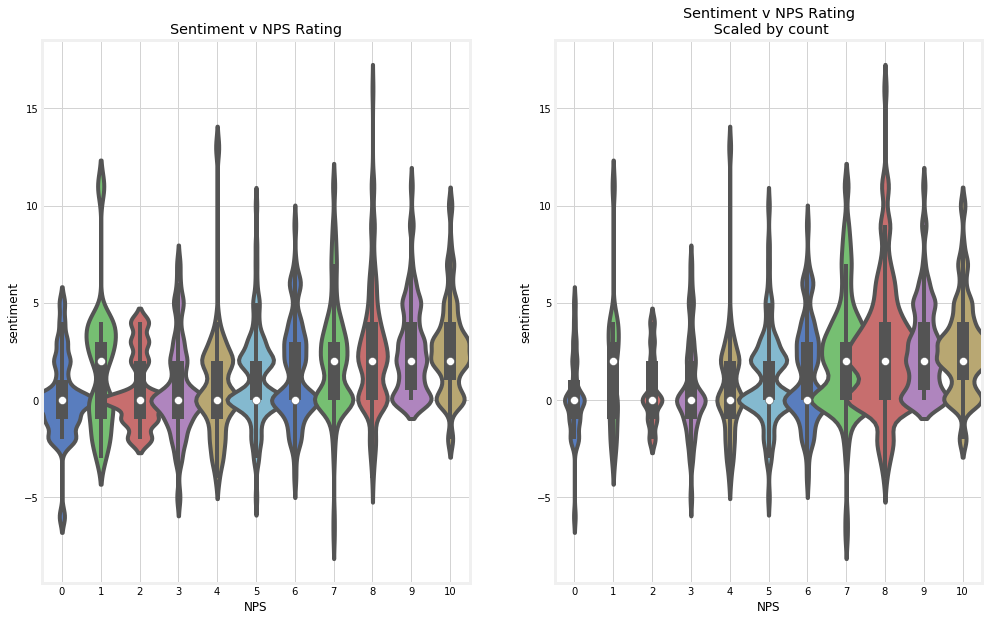

In [35]:
violin_sentiment(dfNPS, 'sentiment')

In [32]:
def weighted_sentiment(df, y):
    dfCross = pd.crosstab(df.NPS, dfNPS[y])              # capture cross tab summary
    dfCounts = dfNPS.groupby('NPS').count()                        # count number of comments per NPSsocre
    dfCross = dfCross.multiply(dfCross.columns.values, axis=1)     # multiply NPS-sentiment count by sentiment
    dfCross = dfCross.divide(dfCounts['Comment'].values, axis=0)   # Normalise the weighted scores by the count of comments
    dfCross['Sum'] = dfCross.sum(axis=1)                           # Sum the normalised weighted sentiments
    
    fig, axes = plt.subplots(1, 2,figsize=(10,5), facecolor='white')
    axes[0].bar(dfCounts.index, dfCounts['Comment'])
    axes[1].plot(dfCross.index, dfCross['Sum'])
    for ax in axes:
        ax.set_axis_bgcolor('white')
        ax.grid(b=True, which='major', color='#d3d3d3', linestyle='-')
        ax.set_xlim([0,10])
        ax.set_xlabel('NPS Rating')
        ax.set_ylabel('Count')

    axes[0].set_title('Count of comments by NPS')
    axes[1].set_title('Weighted sentiment')
    axes[1].set_ylim([-1,2])

/Users/christabellekozlik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  if sys.path[0] == '':


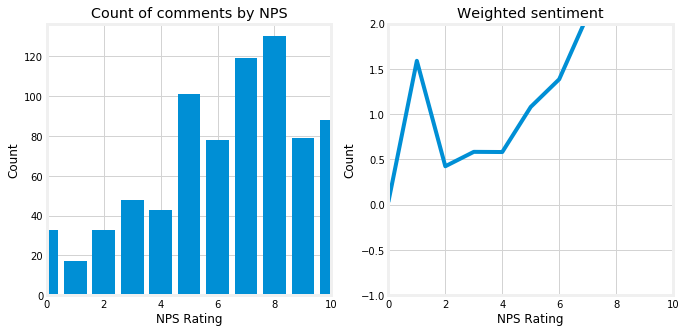

In [33]:
weighted_sentiment(dfNPS, 'sentiment')